In [ ]:
 import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torchvision
import torchvision.datasets
import torchvision.transforms as transforms
from torch.optim import lr_scheduler
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
import os
from sklearn.model_selection import train_test_split
import time
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
%matplotlib inline
from tqdm import tqdm
import numpy as np

In [ ]:
from fastai import * 
from fastai.vision import  * 
%reload_ext autoreload
%autoreload 2
BATCH_SIZE = 64 
IMG_SIZE = 224
WORKERS = 0 
DATA_PATH_STR = './drive/MyDrive/뇌 및 머신러닝/'
DATA_PATH_OBJ = Path(DATA_PATH_STR)
tfms = get_transforms() 

data = (ImageList.from_folder(DATA_PATH_OBJ)        
        .split_by_rand_pct()                        
        .label_from_folder()                          
        .transform(tfms, size=IMG_SIZE)                  
        .databunch(bs=BATCH_SIZE, num_workers=WORKERS)   
        .normalize(imagenet_stats))
data.classes

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpola

['spiral', 'wave']

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpola

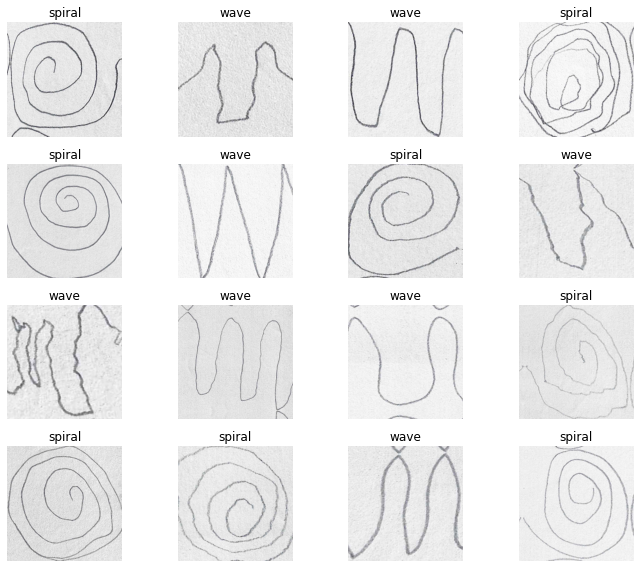

In [ ]:
data.show_batch(rows=4, figsize=(10,8))

In [ ]:
from fastai import * 
from fastai.vision import  * 
%reload_ext autoreload
%autoreload 2
BATCH_SIZE = 64 
IMG_SIZE = 224
WORKERS = 0 
DATA_PATH_STR = './drive/MyDrive/뇌 및 머신러닝/spiral/'
DATA_PATH_OBJ = Path(DATA_PATH_STR)
tfms = get_transforms() 

data_spiral = (ImageList.from_folder(DATA_PATH_OBJ)        
        .split_by_rand_pct()                        
        .label_from_folder()                          
        .transform(tfms, size=IMG_SIZE)                  
        .databunch(bs=BATCH_SIZE, num_workers=WORKERS)   
        .normalize(imagenet_stats))
data_spiral.classes

['healthy', 'parkinson']

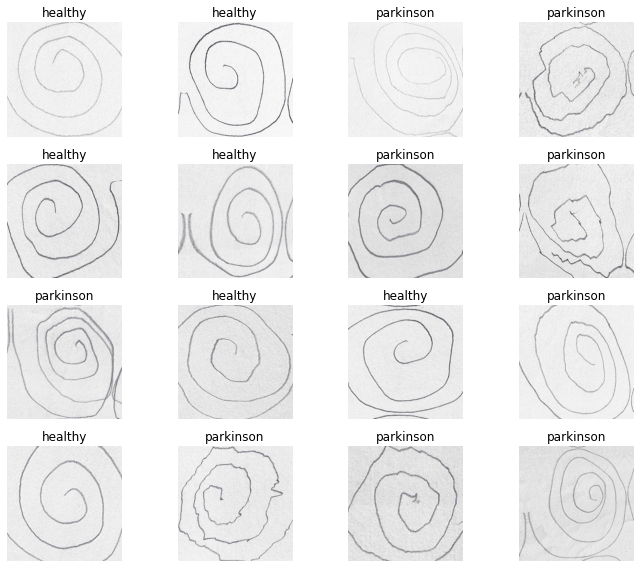

In [ ]:
data_spiral.show_batch(rows=4, figsize=(10,8))

In [ ]:
spiral = pd.read_csv('./drive/My Drive/뇌 및 머신러닝/spiral drawings.csv')
wave = pd.read_csv('./drive/My Drive/뇌 및 머신러닝/wave drawings.csv')
spiral

,NAME,TYPE,COHORT
0,V01HE01,spiral,healthy
1,V01HE02,spiral,healthy
2,V01HE03,spiral,healthy
3,V02HE01,spiral,healthy
4,V02HE02,spiral,healthy
...,...,...,...
97,V14PE02,spiral,PD
98,V14PE03,spiral,PD
99,V15PE01,spiral,PD
100,V15PE02,spiral,PD


In [ ]:
spiral = spiral.replace('healthy',0)
spiral = spiral.replace('PD',1)
spiral

,NAME,TYPE,COHORT
0,V01HE01,spiral,0
1,V01HE02,spiral,0
2,V01HE03,spiral,0
3,V02HE01,spiral,0
4,V02HE02,spiral,0
...,...,...,...
97,V14PE02,spiral,1
98,V14PE03,spiral,1
99,V15PE01,spiral,1
100,V15PE02,spiral,1


In [ ]:
df = spiral.drop('COHORT',axis=1)
df2 = spiral['COHORT']
x_train, x_test, y_train, y_test = train_test_split(df,df2,test_size=0.2)
len(x_train), len(x_test), len(y_train), len(y_test)

(81, 21, 81, 21)

In [ ]:
wave

,NAME,TYPE,COHORT
0,V01HO01,wave,healthy
1,V01HO02,wave,healthy
2,V01HO03,wave,healthy
3,V02HO01,wave,healthy
4,V02HO02,wave,healthy
...,...,...,...
97,V14PO02,wave,PD
98,V14PO03,wave,PD
99,V15PO01,wave,PD
100,V15PO02,wave,PD


In [ ]:
df3 = wave.drop('COHORT',axis=1)
df4 = wave['COHORT']
x2_train, x2_test, y2_train, y2_test = train_test_split(df3,df4,test_size=0.2)
len(x2_train), len(x2_test), len(y2_train), len(y2_test)

(81, 21, 81, 21)

# 2.
#preobservation of the train set

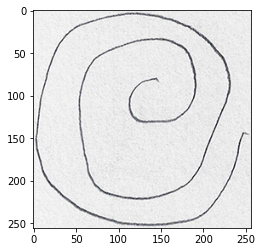

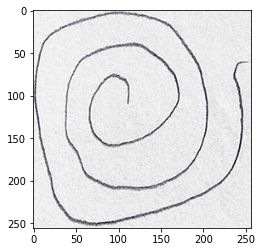

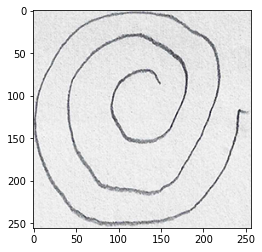

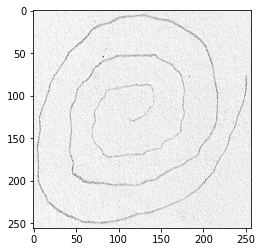

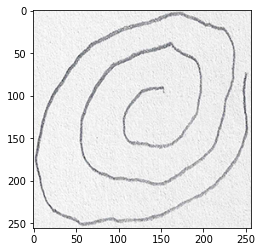

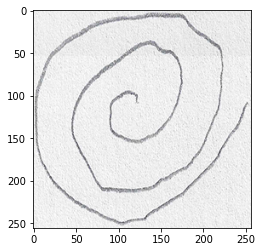

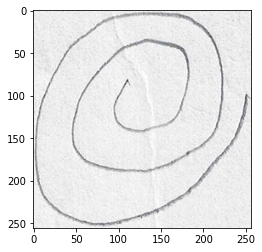

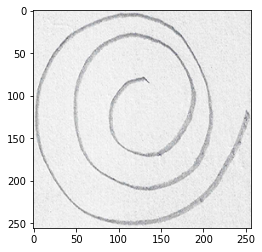

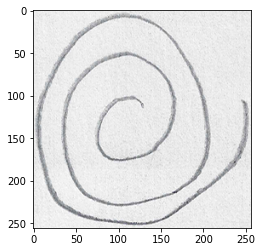

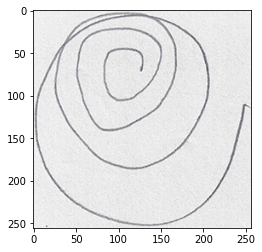

In [ ]:
name = spiral['NAME']
for i in name[0:10]:
    img = mpimg.imread('./drive/My Drive/뇌 및 머신러닝/spiral/healthy/{0}.png'.format(i))
    # img = cv2.imread('/drive/My Drive/뇌 및 머신러닝/spiral/healthy/{0}.png', cv2.IMREAD_UNCHANGED)
    plt.imshow(img)
    plt.show()
    # cv2.imwrite('gray', image)
    # cv2.imshow('gray',image)
#     
    cv2.waitKey(0)
    cv2.destroyAllWindows()

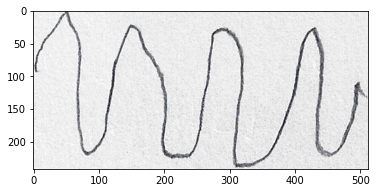

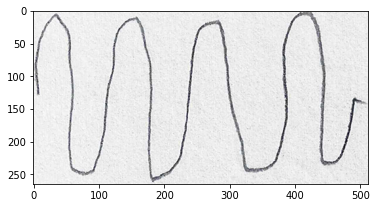

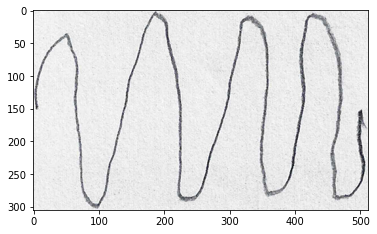

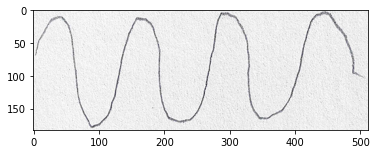

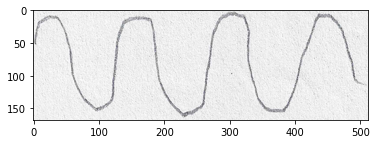

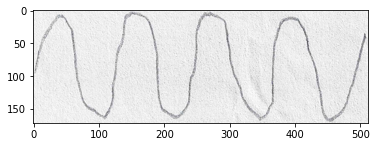

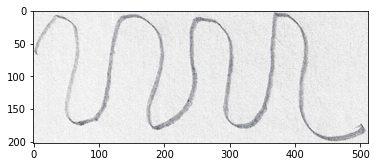

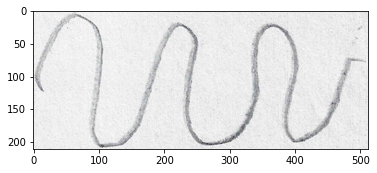

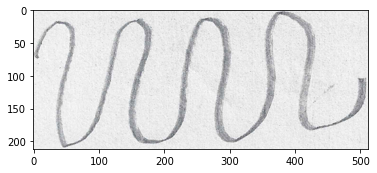

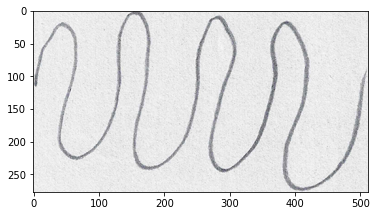

In [ ]:
name2 = wave['NAME']
for i in name2[0:10]:
    img = mpimg.imread('./drive/My Drive/뇌 및 머신러닝/wave/healthy/{0}.png'.format(i))
    # img = cv2.imread('./train_images/{0}.png'.format(i), cv2.IMREAD_UNCHANGED)
    plt.imshow(img)
    plt.show()
    # cv2.imwrite('gray', image)
    # cv2.imshow('gray',image)
#     
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [ ]:
df['NAME'][0:10], df3['NAME'][0:10]

(0    V01HE01
 1    V01HE02
 2    V01HE03
 3    V02HE01
 4    V02HE02
 5    V02HE03
 6     V03HE1
 7     V03HE2
 8     V03HE3
 9    V04HE01
 Name: NAME, dtype: object, 0    V01HO01
 1    V01HO02
 2    V01HO03
 3    V02HO01
 4    V02HO02
 5    V02HO03
 6    V03HO01
 7    V03HO02
 8    V03HO03
 9    V04HO01
 Name: NAME, dtype: object)

In [ ]:
spiral

,NAME,TYPE,COHORT
0,V01HE01,spiral,0
1,V01HE02,spiral,0
2,V01HE03,spiral,0
3,V02HE01,spiral,0
4,V02HE02,spiral,0
...,...,...,...
97,V14PE02,spiral,1
98,V14PE03,spiral,1
99,V15PE01,spiral,1
100,V15PE02,spiral,1


# Spiral VGG19

In [ ]:
class SpiralData(Dataset):
    def __init__(self,csv_file,transform):
        self.data = pd.read_csv(csv_file)
        self.transform = transform
    def __len__(self):
        return len(self.data)
    def __getitem__(self,idx):
        img_name = os.path.join('./drive/My Drive/뇌 및 머신러닝/spiral/', self.data.loc[idx,'NAME'] + '.png')
        image = cv2.imread(img_name)
        image=Image.fromarray(image) 
        IMG_SIZE = 224
        image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
        image = self.transform(image)
        label = torch.tensor(spiral.loc[idx,'COHORT'])
        return {'image': image,
                'labels': label}

In [ ]:
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()
])

In [ ]:
spiral

,NAME,TYPE,COHORT
0,V01HE01,spiral,0
1,V01HE02,spiral,0
2,V01HE03,spiral,0
3,V02HE01,spiral,0
4,V02HE02,spiral,0
...,...,...,...
97,V14PE02,spiral,1
98,V14PE03,spiral,1
99,V15PE01,spiral,1
100,V15PE02,spiral,1


In [ ]:
Dataset = SpiralData(csv_file='./drive/My Drive/뇌 및 머신러닝/spiral drawings.csv' ,transform = train_transform)
train_spiral_set, test_spiral_set = torch.utils.data.random_split(Dataset,[81,21])
train_spiral_loader = torch.utils.data.DataLoader(train_spiral_set,
                                          shuffle=True, num_workers=0,drop_last=True)
test_spiral_loader = torch.utils.data.DataLoader(test_spiral_set,
                                          shuffle=True, num_workers=0,drop_last=True)
train_spiral_set[1]

{'image': tensor([[[0.9490, 0.9412, 0.9216,  ..., 0.9176, 0.9020, 0.9216],
          [0.9373, 0.9333, 0.9412,  ..., 0.9255, 0.8667, 0.9020],
          [0.9373, 0.9490, 0.9451,  ..., 0.9059, 0.8941, 0.9137],
          ...,
          [0.9373, 0.9333, 0.9412,  ..., 0.9137, 0.9059, 0.8980],
          [0.9176, 0.9255, 0.9373,  ..., 0.9137, 0.9137, 0.8863],
          [0.9451, 0.9529, 0.9333,  ..., 0.9373, 0.9176, 0.9020]],
 
         [[0.9490, 0.9412, 0.9216,  ..., 0.9176, 0.9020, 0.9216],
          [0.9373, 0.9333, 0.9412,  ..., 0.9255, 0.8667, 0.9020],
          [0.9373, 0.9490, 0.9451,  ..., 0.9059, 0.8941, 0.9137],
          ...,
          [0.9373, 0.9333, 0.9412,  ..., 0.9137, 0.9059, 0.8980],
          [0.9176, 0.9255, 0.9373,  ..., 0.9137, 0.9137, 0.8863],
          [0.9451, 0.9529, 0.9333,  ..., 0.9373, 0.9176, 0.9020]],
 
         [[0.9490, 0.9412, 0.9216,  ..., 0.9176, 0.9020, 0.9216],
          [0.9373, 0.9333, 0.9412,  ..., 0.9255, 0.8667, 0.9020],
          [0.9373, 0.9490, 0.94

In [ ]:
test_spiral_set[1]

{'image': tensor([[[0.8980, 0.9333, 0.9294,  ..., 0.8627, 0.8745, 0.9373],
          [0.9412, 0.9294, 0.8667,  ..., 0.8824, 0.9451, 0.9529],
          [0.9412, 0.9294, 0.9216,  ..., 0.9216, 0.9608, 0.9294],
          ...,
          [0.9373, 0.8549, 0.9098,  ..., 0.9490, 0.9373, 0.9529],
          [0.9216, 0.8745, 0.9098,  ..., 0.9137, 0.9294, 0.9216],
          [0.8941, 0.8902, 0.9255,  ..., 0.9216, 0.9059, 0.9333]],
 
         [[0.8980, 0.9333, 0.9294,  ..., 0.8627, 0.8745, 0.9373],
          [0.9412, 0.9294, 0.8667,  ..., 0.8824, 0.9451, 0.9529],
          [0.9412, 0.9294, 0.9216,  ..., 0.9216, 0.9608, 0.9294],
          ...,
          [0.9373, 0.8549, 0.9098,  ..., 0.9490, 0.9373, 0.9529],
          [0.9216, 0.8745, 0.9098,  ..., 0.9137, 0.9294, 0.9216],
          [0.8941, 0.8902, 0.9255,  ..., 0.9216, 0.9059, 0.9333]],
 
         [[0.8980, 0.9333, 0.9294,  ..., 0.8627, 0.8745, 0.9373],
          [0.9412, 0.9294, 0.8667,  ..., 0.8824, 0.9451, 0.9529],
          [0.9412, 0.9294, 0.92

In [ ]:
VGG19 = torchvision.models.vgg19(pretrained = True)
from torchvision.models import vgg19

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth


In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = VGG19.to(device)
learning_rate = 0.001
num_epoch = 10
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=learning_rate)
scheduler = lr_scheduler.StepLR(optimizer,step_size=10)
device

device(type='cuda', index=0)

In [ ]:
loss_arr = []
for i in range(num_epoch):
    scheduler.step()
    model.train()
    for j,batch in enumerate(train_spiral_loader):
        x = batch['image'].to(device)
        y = batch['labels'].to(device)
        
        optimizer.zero_grad()
        output = model.forward(x) 
        loss = loss_func(output,y)
        loss.backward()
        optimizer.step()
        
        if j % 1000 == 0:
            print(loss)
            loss_arr.append(loss.cpu().detach().numpy())           

    

/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:136: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


tensor(9.2336, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.2841, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(1.2393, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.3251, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.4461, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.3901, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(1.4559, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1833, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.7131, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.3802, device='cuda:0', grad_fn=<NllLossBackward>)


In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for b,di in enumerate(test_spiral_loader):
        x_ = di['image'].to(device)
        y_ = di['labels'].to(device)
        
        output = model.forward(x_)
        _,output_index = torch.max(output,1)
        
        total += y_.size(0)
        correct += (output_index == y_).sum().float()
        
    print('Accuracy of Test Data: {}'.format(100*correct/total))

Accuracy of Test Data: 66.66666412353516


## Spiral GoogleNet


In [ ]:
googlenet = torchvision.models.googlenet(pretrained = True)
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = googlenet.to(device)
learning_rate = 0.001
num_epoch = 10
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=learning_rate)
scheduler = lr_scheduler.StepLR(optimizer,step_size=10)
device

Downloading: "https://download.pytorch.org/models/googlenet-1378be20.pth" to /root/.cache/torch/hub/checkpoints/googlenet-1378be20.pth


device(type='cuda', index=0)

In [ ]:
loss_arr = []
# tk0 = tqdm(train_loader, total=int(len(train_loader)))
for i in range(num_epoch):
    scheduler.step()
    model.train()
    for j,batch in enumerate(train_spiral_loader):
        x = batch['image'].to(device)
        y = batch['labels'].to(device)
        
        optimizer.zero_grad()
        output = model.forward(x) 
        loss = loss_func(output,y)
        loss.backward()
        optimizer.step()
        
        if j % 1000 == 0:
            print(loss)
            loss_arr.append(loss.cpu().detach().numpy())           

/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:136: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


tensor(6.8977, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.4234, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(1.0164, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.5031, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.3263, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.4626, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.2593, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.3092, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.3924, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.8510, device='cuda:0', grad_fn=<NllLossBackward>)


In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for b,di in enumerate(test_spiral_loader):
        x_ = di['image'].to(device)
        y_ = di['labels'].to(device)
        
        output = model.forward(x_)
        _,output_index = torch.max(output,1)
        
        total += y_.size(0)
        correct += (output_index == y_).sum().float()
        
    print('Accuracy of Test Data: {}'.format(100*correct/total))

Accuracy of Test Data: 71.42857360839844


## Spiral ResNet50

In [ ]:
resnet50 = torchvision.models.resnet50(pretrained = True)
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = resnet50.to(device)
learning_rate = 0.01
num_epoch = 10
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=learning_rate)
scheduler = lr_scheduler.StepLR(optimizer,step_size=10)
device

device(type='cuda', index=0)

In [ ]:
loss_arr = []
# tk0 = tqdm(train_loader, total=int(len(train_loader)))
for i in range(num_epoch):
    scheduler.step()
    model.train()
    for j,batch in enumerate(train_spiral_loader):
        x = batch['image'].to(device)
        y = batch['labels'].to(device)
        
        optimizer.zero_grad()
        output = model.forward(x) 
        loss = loss_func(output,y)
        loss.backward()
        optimizer.step()
        
        if j % 1000 == 0:
            print(loss)
            loss_arr.append(loss.cpu().detach().numpy())     

/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:136: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


tensor(8.2237, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(2.6599, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.7525, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(1.1546, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(1.0927, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.3526, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(1.0571, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.6643, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.9331, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.7034, device='cuda:0', grad_fn=<NllLossBackward>)


Text(0.5, 1.0, 'ResNet50 Spiral Loss Graph')

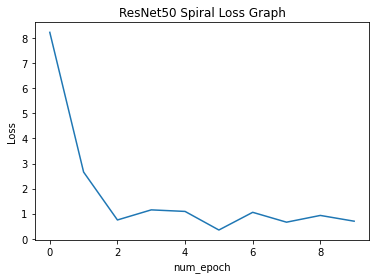

In [ ]:
plt.plot(loss_arr)
plt.xlabel('num_epoch')
plt.ylabel('Loss')
plt.title('ResNet50 Spiral Loss Graph')

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for b,di in enumerate(test_spiral_loader):
        x_ = di['image'].to(device)
        y_ = di['labels'].to(device)
        
        output = model.forward(x_)
        _,output_index = torch.max(output,1)
        
        total += y_.size(0)
        correct += (output_index == y_).sum().float()
        
    print('Accuracy of Test Data: {}'.format(100*correct/total))

Accuracy of Test Data: 57.14285659790039


In [ ]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(rfc_data, x_test, y_test, normalize = 'all')